In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [2]:
train=pd.read_csv('train(loan).csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('test(loan).csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
Id=test.Loan_ID

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [7]:
train.shape

(614, 12)

In [8]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isna().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [11]:
train['LoanAmount'].mean()

146.41216216216216

In [12]:
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
train=train.dropna()

In [14]:
#train['Gender']=train['Gender'].fillna(train['Gender'].mode()[0])
#train['Married']=train['Married'].fillna(train['Married'].mode()[0])
#train['Dependents']=train['Dependents'].fillna(test['Dependents'].mode()[0])
#train['Self_Employed']=train['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
#train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
#train['Credit_History']=train['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [15]:
test['Gender']=test['Gender'].fillna(train['Gender'].mode()[0])
test['Married']=test['Married'].fillna(train['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0])
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mode()[0])


In [16]:
train['LoanAmount']=train['LoanAmount'].fillna(train['LoanAmount'].mean())
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())

In [17]:
train['Loan_Amount_Term'].unique()

array([360., 120., 180.,  60., 300., 480., 240.,  36.,  84.])

In [18]:
train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [20]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Y    332
N    148
Name: Loan_Status, dtype: int64


<AxesSubplot:>

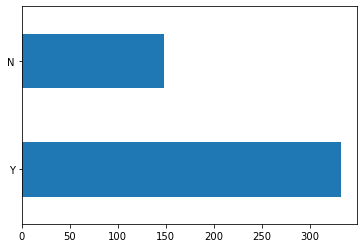

In [22]:
print(train['Loan_Status'].value_counts())
(train['Loan_Status'].value_counts()).plot(kind='barh')

In [23]:
((train['Loan_Status'].value_counts()/train['Loan_Status'].shape)*100)

Y    69.166667
N    30.833333
Name: Loan_Status, dtype: float64

In [24]:
train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

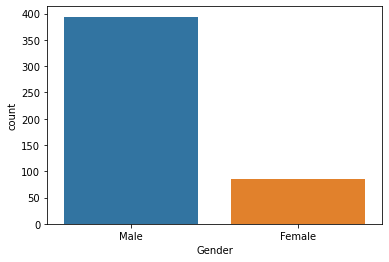

In [25]:
sns.countplot(train['Gender'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

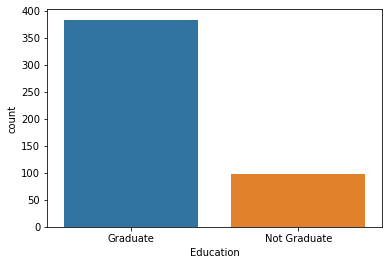

In [26]:
sns.countplot(train['Education'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

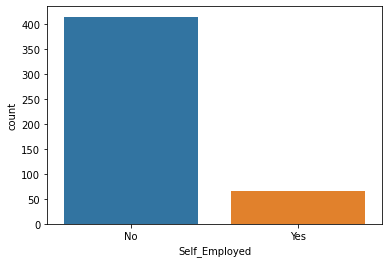

In [27]:
sns.countplot(train['Self_Employed'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

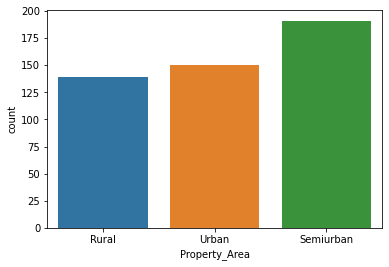

In [28]:
sns.countplot(train['Property_Area'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

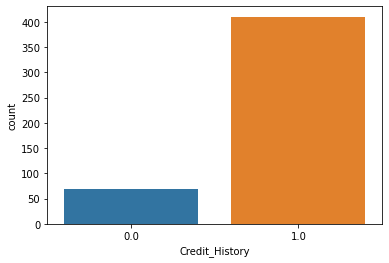

In [29]:
sns.countplot(train['Credit_History'])

D:\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

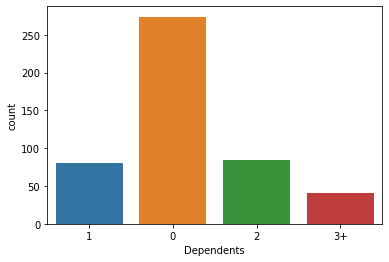

In [30]:
sns.countplot(train['Dependents'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

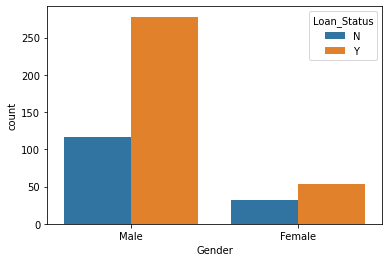

In [31]:
sns.countplot(x=train['Gender'],hue=train['Loan_Status'])

<AxesSubplot:xlabel='Education', ylabel='count'>

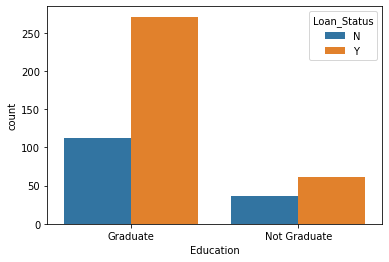

In [32]:
sns.countplot(x=train['Education'],hue=train['Loan_Status'])

<AxesSubplot:xlabel='Married', ylabel='count'>

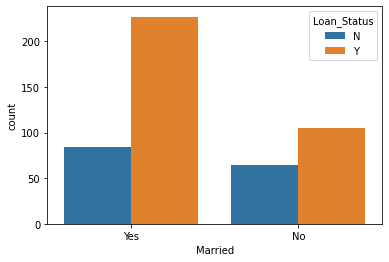

In [33]:
sns.countplot(x=train['Married'],hue=train['Loan_Status'])

In [34]:
le=LabelEncoder()

In [35]:
train['Gender']=le.fit_transform(train['Gender'])
train['Married']=le.fit_transform(train['Married'])
train['Education']=le.fit_transform(train['Education'])
train['Self_Employed']=le.fit_transform(train['Self_Employed'])
train['Property_Area']=le.fit_transform(train['Property_Area'])

In [36]:
test['Gender']=le.fit_transform(test['Gender'])
test['Married']=le.fit_transform(test['Married'])
test['Education']=le.fit_transform(test['Education'])
test['Self_Employed']=le.fit_transform(test['Self_Employed'])
test['Property_Area']=le.fit_transform(test['Property_Area'])
test['Credit_History']=le.fit_transform(test['Credit_History'])

In [37]:
train['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [38]:
train['Dependents']=train['Dependents'].replace('3+',4)
test['Dependents']=test['Dependents'].replace('3+',4)

In [39]:
train['Dependents'].unique()

array(['1', '0', '2', 4], dtype=object)

In [40]:
combine=[train,test]

In [41]:
for dataset in combine:
    dataset['Total_Income']=dataset['ApplicantIncome'] + dataset['CoapplicantIncome']

In [42]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,6000.0
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,Y,9613.0


In [43]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,1,0,0,0,5720,0,110.0,360.0,1,2,5720
1,1,1,1,0,0,3076,1500,126.0,360.0,1,2,4576
2,1,1,2,0,0,5000,1800,208.0,360.0,1,2,6800
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2,4886
4,1,0,0,1,0,3276,0,78.0,360.0,1,2,3276


In [44]:
train['CoapplicantIncome']=train['CoapplicantIncome'].astype('int')
train['LoanAmount']=train['LoanAmount'].astype('int')
train['Loan_Amount_Term']=train['Loan_Amount_Term'].astype('int')
train['Credit_History']=train['Credit_History'].astype('int')

test['CoapplicantIncome']=test['CoapplicantIncome'].astype('int')
test['LoanAmount']=test['LoanAmount'].astype('int')
test['Loan_Amount_Term']=test['Loan_Amount_Term'].astype('int')
test['Credit_History']=test['Credit_History'].astype('int')

In [45]:
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Total_Income         0
dtype: int64

<AxesSubplot:>

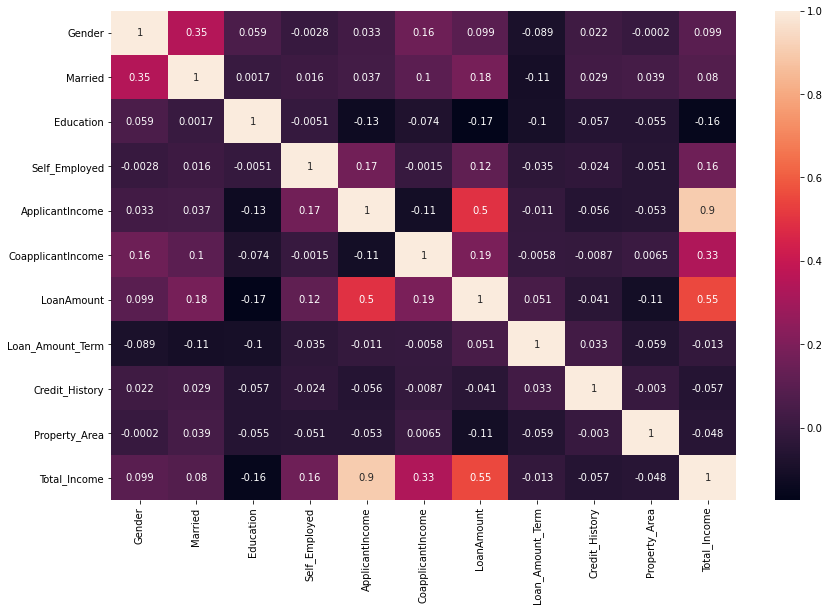

In [46]:
plt.figure(figsize=(14,9))
sns.heatmap(train.corr(),annot=True)

In [47]:
x=train.drop(['Loan_Status','CoapplicantIncome','ApplicantIncome'],axis=1)
y=train.Loan_Status
y.head()

1    N
2    Y
3    Y
4    Y
5    Y
Name: Loan_Status, dtype: object

In [48]:
test=test.drop(['CoapplicantIncome','ApplicantIncome'],axis=1)

In [49]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
1,1,1,1,0,0,4583,1508,128,360,1,0,N,6091.0
2,1,1,0,0,1,3000,0,66,360,1,2,Y,3000.0
3,1,1,0,1,0,2583,2358,120,360,1,2,Y,4941.0
4,1,0,0,0,0,6000,0,141,360,1,2,Y,6000.0
5,1,1,2,0,1,5417,4196,267,360,1,2,Y,9613.0


<AxesSubplot:>

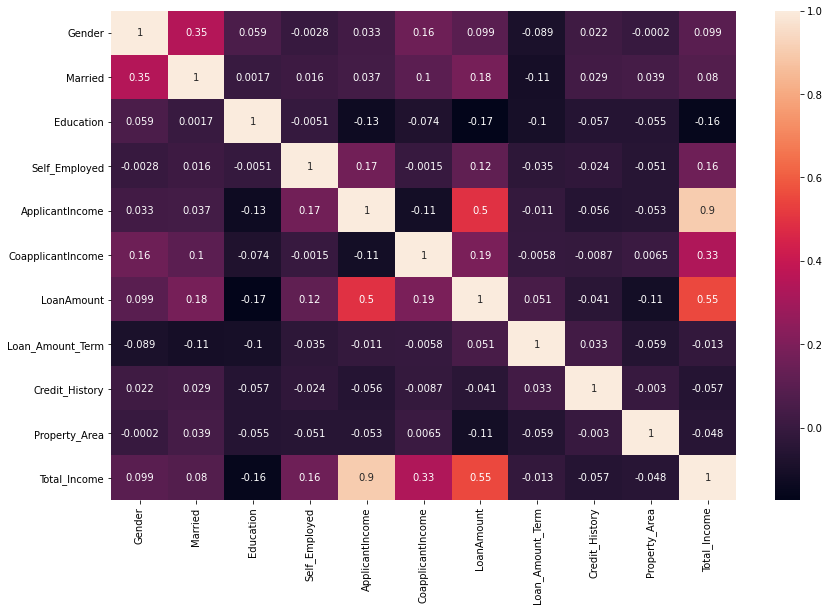

In [50]:
plt.figure(figsize=(14,9))
sns.heatmap(train.corr(),annot=True)

In [51]:
trainx,testx,trainy,testy=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)

In [53]:
trainx_re,trainy_re=sm.fit_resample(trainx,trainy)

In [54]:
#creating the objects
logreg_cv = LogisticRegression(solver='liblinear',random_state=42)
dt_cv=DecisionTreeClassifier(random_state=123)
knn_cv=KNeighborsClassifier()
nb_cv=GaussianNB()
rf_cv=RandomForestClassifier(random_state=123)
et_cv=ExtraTreesClassifier(random_state=123)
ad_cv=AdaBoostClassifier(random_state=123)
#svc_cv=SVC(kernel='linear',random_state=123)

cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'Naive Bayes',4:'Random Forest',5:'ExtraTrees',6:'ADb'}
cv_models=[logreg_cv,dt_cv,knn_cv,nb_cv,rf_cv,et_cv,ad_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model,trainx,trainy, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.7968960863697705
Decision Tree Test Accuracy: 0.7443994601889339
KNN Test Accuracy: 0.6456815114709851
Naive Bayes Test Accuracy: 0.7892037786774628
Random Forest Test Accuracy: 0.8097165991902834
ExtraTrees Test Accuracy: 0.7601214574898786
ADb Test Accuracy: 0.762753036437247


## RandomForestClassifier

In [55]:
rfc=RandomForestClassifier(random_state=123)

In [56]:
param_grid={'n_estimators':[100,400,300],'criterion':['gini','entropy'],'max_depth':[2,4,3],
    'min_samples_split':[5,3,4],'min_samples_leaf':[1,2,3,4]}

In [57]:
grid=GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [58]:
grid.fit(trainx,trainy)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [5, 3, 4],
                         'n_estimators': [100, 400, 300]},
             scoring='accuracy', verbose=1)

In [59]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [60]:
grid_rf=RandomForestClassifier(criterion='gini', min_samples_leaf=3,max_depth=6, min_samples_split=3,n_estimators=400,random_state=60)

In [61]:
grid_rf.fit(trainx,trainy)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=400, random_state=60)

In [62]:
grid_pred_rf=grid_rf.predict(testx)
grid_pred_rf1=grid_rf.predict(trainx)

In [63]:
accuracy_score(testy,grid_pred_rf)

0.8229166666666666

In [64]:
accuracy_score(trainy,grid_pred_rf1)

0.8385416666666666

In [65]:
print(cross_val_score(grid_rf, trainx,trainy, cv=3))

[0.7890625 0.7734375 0.8046875]


In [66]:
grid_rf.score(trainx,trainy)

0.8385416666666666

## Gradient booster

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [68]:
gb=GradientBoostingClassifier()

In [69]:
gb.fit(trainx,trainy)

GradientBoostingClassifier()

In [70]:
gb_predict=gb.predict(testx)
gb_predict1=gb.predict(trainx)

In [71]:
print(accuracy_score(testy,gb_predict))
print(accuracy_score(trainy,gb_predict1))

0.7708333333333334
0.9140625


In [72]:
gb_param_grid={'n_estimators':[50,100,150,200],'loss':['deviance','exponential'],'criterion':['friedman_mse','mse','mae'],
    'min_samples_split':[5,3,4,6],'min_samples_leaf':[1,2,3,]}

In [73]:
gb_grid=GridSearchCV(estimator=gb, param_grid=gb_param_grid, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [74]:
gb_grid.fit(trainx,trainy)

Fitting 4 folds for each of 288 candidates, totalling 1152 fits


GridSearchCV(cv=4, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'loss': ['deviance', 'exponential'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [5, 3, 4, 6],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [75]:
gb_grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'deviance',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'n_estimators': 150}

In [76]:
grid_gb=GradientBoostingClassifier(criterion='friedman_mse', loss='exponential',min_samples_leaf=1,
                                   min_samples_split=4,n_estimators=100,random_state=60)

In [77]:
grid_gb.fit(trainx,trainy)

GradientBoostingClassifier(loss='exponential', min_samples_split=4,
                           random_state=60)

In [78]:
grid_pred_gb=grid_gb.predict(testx)
grid_pred_gb1=grid_gb.predict(trainx)

In [79]:
print(accuracy_score(testy,grid_pred_gb))
print(accuracy_score(trainy,grid_pred_gb1))

0.78125
0.90625


## AdaBoostClassifier

In [80]:
adb=AdaBoostClassifier(random_state=54)

In [81]:
adb.fit(trainx,trainy)
adb_predict=adb.predict(testx)
adb_predict1=adb.predict(trainx)

In [82]:
print(accuracy_score(testy,adb_predict))
print(accuracy_score(trainy,adb_predict1))

0.78125
0.859375


In [83]:
adb_param_grid={'n_estimators':[50,100,150,200],'learning_rate':[1.0,2.0,3.0]}


In [84]:
adb_grid=GridSearchCV(estimator=adb, param_grid=adb_param_grid, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [85]:
adb_grid.fit(trainx,trainy)

Fitting 4 folds for each of 12 candidates, totalling 48 fits


GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=54), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 2.0, 3.0],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [86]:
adb_grid.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

## Decision tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
dc=DecisionTreeClassifier(random_state=50)

In [88]:
dc.fit(trainx,trainy)

DecisionTreeClassifier(random_state=50)

In [89]:
dc_pred=dc.predict(testx)
dc_pred1=dc.predict(trainx)

In [90]:
accuracy_score(testy,dc_pred)

0.7083333333333334

In [91]:
accuracy_score(trainy,dc_pred1)

1.0

In [92]:
param_grid1={
    'criterion':['gini','entropy'],'max_depth':[1,2,3],
    'max_features':[1,2,3],
    'max_leaf_nodes':[1,2],
    'min_samples_split':[2,3,4,5,6],
    'min_samples_leaf':[1,2,3]}

In [93]:
grid1=GridSearchCV(estimator=dc, param_grid=param_grid1, n_jobs=-1, cv=4,verbose=1,scoring='accuracy')

In [94]:
grid1.fit(trainx,trainy)

Fitting 4 folds for each of 540 candidates, totalling 2160 fits


D:\New folder\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.6875     0.6875     0.6875
 0.6875     0.6875     0.6875     0.6875     0.6875     0.6875
 0.6875     0.6875     0.6875     0.6875     0.6875     0.6875
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.69791667 0.69791667 0.69791667
 0.69791667 0.69791667 0.69791667 0.69791667 0.69791667 0.69791667
 0.69791667 0.69791667 0.69791667 0.69791667 0.69791667 0.69791667
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.69791667 0.69791667 0.69791667
 0.697916

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=50), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3], 'max_features': [1, 2, 3],
                         'max_leaf_nodes': [1, 2],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='accuracy', verbose=1)

In [95]:
grid1.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'max_features': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [96]:
grid_dc=DecisionTreeClassifier(criterion='gini',max_depth=1,max_features=1
                        ,max_leaf_nodes=2,min_samples_leaf=1, min_samples_split=2,random_state=42)

In [97]:
grid_dc.fit(trainx,trainy)

DecisionTreeClassifier(max_depth=1, max_features=1, max_leaf_nodes=2,
                       random_state=42)

In [98]:
grid_dc_pred=grid_dc.predict(testx)
grid_dc_pred1=grid_dc.predict(trainx)

In [99]:
print(accuracy_score(testy,grid_dc_pred))
print(accuracy_score(trainy,grid_dc_pred1))

0.7083333333333334
0.6875


## ExtraTreesClassifier

In [ ]:
ExtC = ExtraTreesClassifier()
ex_param_grid = {
              "max_features": [5, 6, 4],
              "min_samples_split": [2, 3, 4],
              "min_samples_leaf": [1, 3, 4],
              "n_estimators" :[600,300,400,500],
              "criterion": ["gini","entropy"]}
gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=4, scoring="accuracy", n_jobs= -1, verbose = 1)
gsExtC.fit(trainx,trainy)


Fitting 4 folds for each of 216 candidates, totalling 864 fits


In [ ]:
gsExtC.best_params_

In [ ]:
gsExtC = ExtraTreesClassifier(random_state=42,criterion='gini',max_features=9,
                              min_samples_leaf=5, min_samples_split=5,n_estimators=600)

In [ ]:
gsExtC.fit(trainx,trainy)

In [ ]:
pred_exc=gsExtC.predict(testx)
pred_exc1=gsExtC.predict(trainx)

In [ ]:
accuracy_score(testy,pred_exc)

In [ ]:
accuracy_score(trainy,pred_exc1)

In [ ]:
rf_pred_test=gsExtC.predict(test)
rf_pred_test

In [ ]:
df=pd.DataFrame({'Loan_Status':rf_pred_test},index=Id)
df

In [ ]:
file_name='rf_loan.csv'
df.to_csv(file_name)